In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


f_off = -2.835503418452676e-06
tsamp = 17.986224128
plt_args = {
            'aspect':'auto',
            'origin':'lower',
            'rasterized':True,
            'interpolation':'nearest',
            'cmap':'viridis'
            }

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [3]:
df = pd.read_pickle("info_all.pkl")
df = df.set_index("index")
df.sort_index()

,statistic,pvalue,block_num,freqs
index,,,,
0,1458.939302,0.000000e+00,0,1926.269531
100,1164.556241,1.317726e-253,0,1926.269248
200,1242.913410,1.272865e-270,0,1926.268964
300,1533.651612,0.000000e+00,0,1926.268681
400,1585.480041,0.000000e+00,0,1926.268397
...,...,...,...,...
318230012,24.068235,5.938123e-06,21,1023.927244
318230112,20.517493,3.504959e-05,21,1023.926961
318230212,25.032166,3.667197e-06,21,1023.926677


In [4]:
df.describe()

,statistic,pvalue,block_num,freqs
count,3.182256e+06,3.182256e+06,3.182256e+06,3.182256e+06
mean,2.177388e+02,1.382241e-03,1.050000e+01,1.475098e+03
std,8.034907e+02,1.293470e-02,6.344290e+00,2.604842e+02
min,3.119978e-03,0.000000e+00,0.000000e+00,1.023926e+03
25%,1.971069e+01,5.846351e-10,5.000000e+00,1.249512e+03
50%,2.813181e+01,7.784932e-07,1.050000e+01,1.475098e+03
75%,4.252007e+01,5.246614e-05,1.600000e+01,1.700684e+03
max,1.049079e+04,9.984412e-01,2.100000e+01,1.926270e+03


In [5]:
filtered_freqs = df["freqs"]
p_vals = df["pvalue"]
stats = df["statistic"]

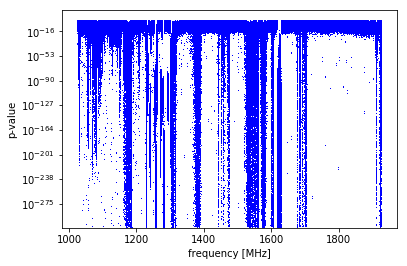

In [6]:
plt.figure()
plt.yscale("log")
plt.ylabel("p-value")
plt.xlabel("frequency [MHz]")
plt.plot(filtered_freqs, p_vals,'b,')

In [7]:
# plt.figure()
# plt.ylabel("statistic")
# plt.xlabel("frequency [MHz]")
# plt.plot(filtered_freqs, stats,'b,')

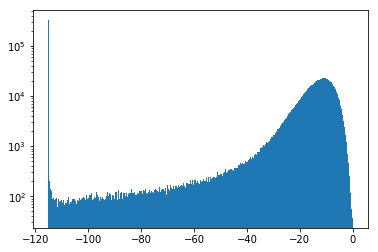

In [8]:
plt.figure()
plt.yscale("log")
n, bins, patches = plt.hist(np.log(p_vals+1e-50), bins=1000)

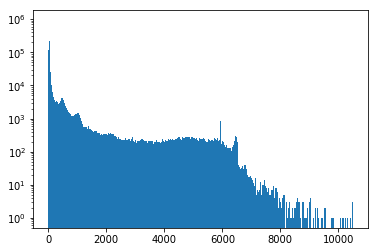

In [9]:
plt.figure()
plt.yscale("log")
n, bins, patches = plt.hist(stats, bins=1000)

In [10]:
source_dir = "GBT_57532_09539_HIP56445_fine/"
filtered_dir = source_dir+"filtered/"
info_df = pd.read_pickle(source_dir+"info_df.pkl").astype({"index":int, "block_num":int})
info_df.set_index("index")
info_df.sort_index()

,index,statistic,pvalue,block_num,freqs
0,289301080,6219.655813,0.000000e+00,20,1105.955330
1,289301180,6234.612421,0.000000e+00,20,1105.955046
2,289302380,301.247182,3.845966e-66,20,1105.951644
3,289302480,295.603308,6.464831e-65,20,1105.951360
4,289460580,1892.986158,0.000000e+00,20,1105.503067
...,...,...,...,...,...
347726,172513356,273.589265,3.898037e-60,11,1437.107321
347727,172641072,925.144163,1.280848e-201,11,1436.745181
347728,172641172,901.779106,1.517593e-196,11,1436.744898
347729,173063572,5932.901913,0.000000e+00,11,1435.547181


In [11]:
filtered_freqs = info_df["freqs"]
p_vals = info_df["pvalue"]
stats = info_df["statistic"]

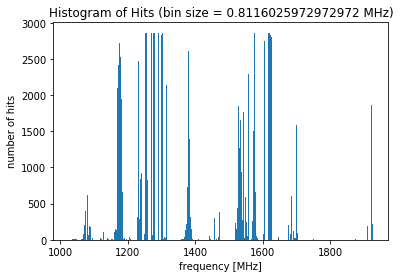

In [12]:
num_bins = int(1000000//(1926.269531 - 1025.390648))
plt.figure()
plt.title(f"Histogram of Hits (bin size = {(1926.269531 - 1025.390648) / num_bins} MHz)")
plt.ylabel("number of hits")
plt.xlabel("frequency [MHz]")
n, bins, patches = plt.hist(filtered_freqs, bins=num_bins)

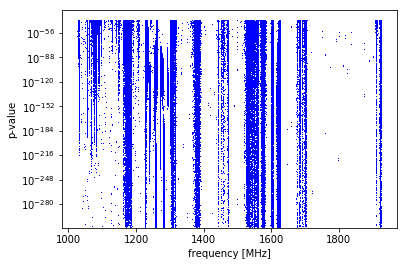

In [13]:
plt.figure()
plt.yscale("log")
plt.ylabel("p-value")
plt.xlabel("frequency [MHz]")
plt.plot(filtered_freqs, p_vals,'b,')

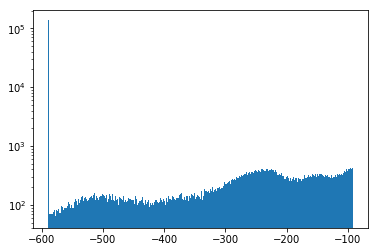

In [14]:
plt.figure()
plt.yscale("log")
n, bins, patches = plt.hist(np.log(p_vals+1e-256), bins=1000)

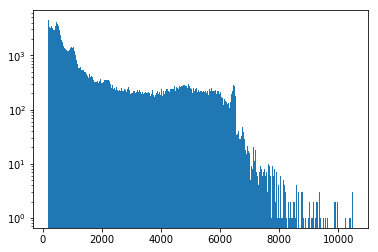

In [15]:
plt.figure()
plt.yscale("log")
n, bins, patches = plt.hist(stats, bins=1000)

In [16]:
sample_size = 10
num_rows, num_cols = info_df.shape
step_size = num_rows//sample_size
start = np.random.randint(step_size)
sample_indexes = np.arange(start, num_rows, step_size)
samples = info_df.sort_values("pvalue").iloc[sample_indexes]
samples

,index,statistic,pvalue,block_num,freqs
108669,113105744,3186.598012,0.000000e+00,7,1605.557807
341655,193577592,2077.209472,0.000000e+00,13,1377.379607
37959,265317896,4697.577384,0.000000e+00,18,1173.959730
204031,218164076,1388.508716,3.084347e-302,15,1307.664548
98922,108685580,971.001435,1.411618e-211,7,1618.091198
81030,106890948,692.627403,3.961598e-151,7,1623.179883
321051,246417908,534.565237,8.329784e-117,17,1227.550711
252877,228752036,442.905097,6.673909e-97,15,1277.642351
81934,106981848,327.410578,8.011177e-72,7,1622.922136
220848,220358408,217.824068,5.013081e-48,15,1301.442512


In [33]:
def load_samples(n):
    rows, data_sections = [], []
    for ind in range(n):
        rows.append(samples.iloc[ind])
        i, s, p, block_num, start_freq = rows[-1]
        data_sections.append(np.load(f"{filtered_dir}{int(block_num)}/{int(i)}.npy"))

    def plot_sample(index):
        i, s, p, block_num, start_freq = rows[index]
        i, block_num = int(i), int(block_num)
        sub_freqs = np.arange(start_freq, start_freq+f_off*201, f_off)

        plt.figure(figsize=(10, 6))
        plt.title(f"Index {i} in Block {block_num}, p-value={p:6E}")
        plt.yticks(np.arange(0, 16), list(map(lambda x: "%.2f" % x, np.arange(0, tsamp*18, tsamp))))
        plt.xticks(np.arange(0, 200, 49), list(map(lambda x: "%.5f" % x, sub_freqs[np.arange(0, 200, 49)])))
        plt.ylabel("time from obs start [s]")
        plt.xlabel("frequency [MHz]")
        plt.imshow(data_sections[index], **plt_args)
    return plot_sample
    
interact(load_samples(10),index=widgets.IntSlider(min=0, max=9, step=1, value=5))

interactive(children=(IntSlider(value=5, description='index', max=9), Output()), _dom_classes=('widget-interac…

<function __main__.load_samples.<locals>.plot_sample(index)>

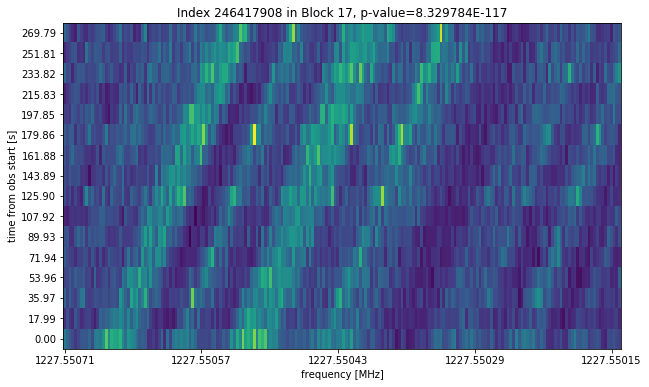

In [34]:
# for Github where interactive doesn't render

i, s, p, block_num, start_freq = samples.iloc[6]
i, block_num = int(i), int(block_num)
data_section = np.load(f"{filtered_dir}{int(block_num)}/{int(i)}.npy")
sub_freqs = np.arange(start_freq, start_freq+f_off*201, f_off)

plt.figure(figsize=(10, 6))
plt.title(f"Index {i} in Block {block_num}, p-value={p:6E}")
plt.yticks(np.arange(0, 16), list(map(lambda x: "%.2f" % x, np.arange(0, tsamp*18, tsamp))))
plt.xticks(np.arange(0, 200, 49), list(map(lambda x: "%.5f" % x, sub_freqs[np.arange(0, 200, 49)])))
plt.ylabel("time from obs start [s]")
plt.xlabel("frequency [MHz]")
plt.imshow(data_section, **plt_args)